<a href="https://colab.research.google.com/github/BRIJNANDA1979/CNN-Sentinel/blob/master/Understand_band_data_info_using_histogram_and_classifying_pixel_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [512]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/multispectral-remote-sensing/vegetation-indices-in-python/calculate-NDVI-python/
#Sentinel 2 Use Handbook. https://sentinels.copernicus.eu/documents/247904/685211/Sentinel-2_User_Handbook



In [513]:
!pip install rioxarray


In [514]:
!pip install geopandas

In [515]:
import os

import matplotlib.pyplot as plt
import numpy as np
import rioxarray as rxr
import geopandas as gpd



In [516]:
path = '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif'
#os.chdir(path)
#data_path = os.path.join("/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif")
data = rxr.open_rasterio(path)

In [517]:
data.shape

(1, 20, 20)

In [518]:
!pip install earthpy

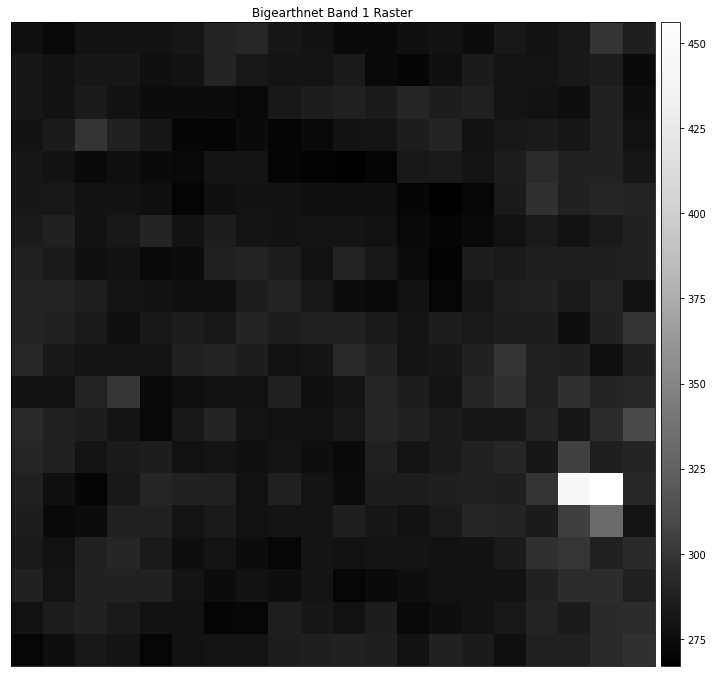

In [519]:
import earthpy as et
import earthpy.spatial as es
import earthpy.plot as ep
ep.plot_bands(data,
              title="Bigearthnet Band 1 Raster")
plt.show()

In [520]:
#https://earthpy.readthedocs.io/en/latest/gallery_vignettes/plot_bands_functionality.html
#Stack all bands of BigEarthNet Data sample one band tiff images
import glob
files = glob.glob(os.path.join('/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B*.tif'))
files.sort()
print("Number of Bands",len(files))
print(files)
print(files[0])   # Band1
print(files[1])   # Band2
print(files[10])  # Band12
#array_stack, meta_data = es.stack(path, nodata=-9999)


Number of Bands 12
['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B05.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B06.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B07.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B09.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2

# New Section

/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif


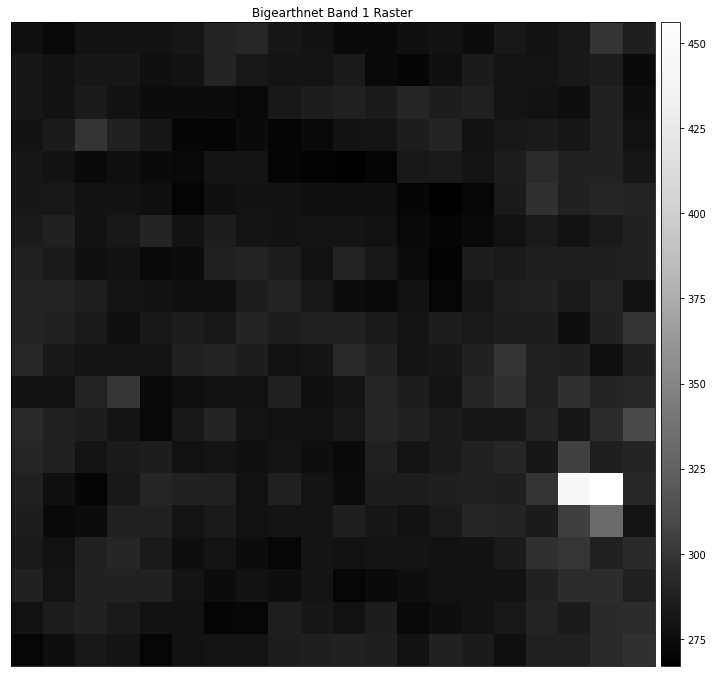

The CRS of this data is: EPSG:32634
+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs
(499980.0, 7032840.0, 501180.0, 7034040.0)
(60.0, -60.0)
The nodatavalue of your data is: None
Number of bands 1
The shape of your data is: (1, 20, 20)
min value: 267
max value: 456


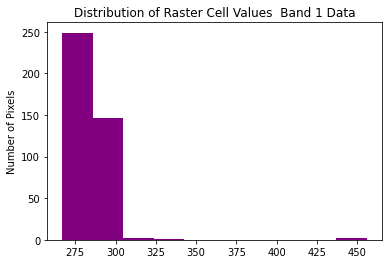

In [521]:
print(files[0])
band1= rxr.open_rasterio(files[0])
ep.plot_bands(band1,
              title="Bigearthnet Band 1 Raster")
plt.show()
print("The CRS of this data is:", band1.rio.crs)
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.
print(band1.rio.bounds())
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
print(band1.rio.resolution())
print("The nodatavalue of your data is:", band1.rio.nodata)
# How many bands / layers does the object have?
print("Number of bands", band1.rio.count)
print("The shape of your data is:", band1.shape)
print('min value:', np.nanmin(band1))
print('max value:', np.nanmax(band1))
import matplotlib.pyplot as plt
f, ax = plt.subplots()
band1.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Band 1 Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif


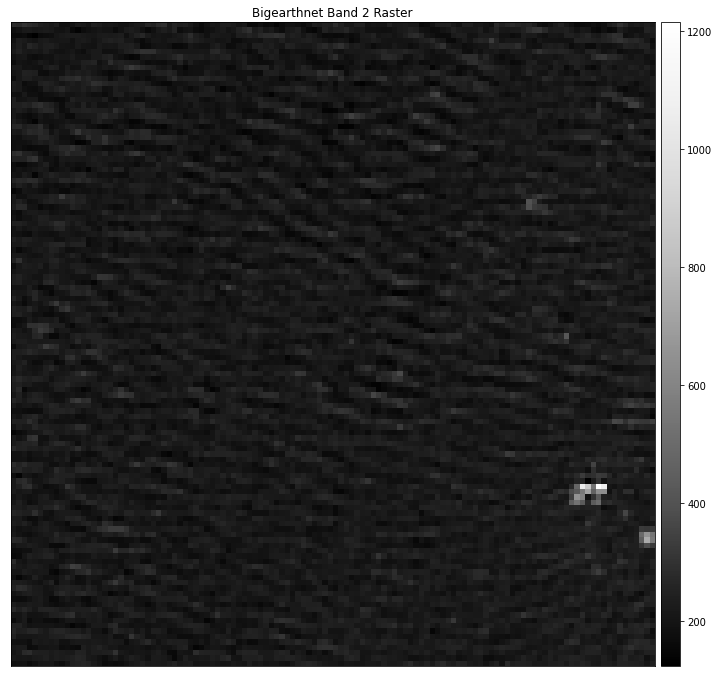

The CRS of this data is: EPSG:32634
+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs
(499980.0, 7032840.0, 501180.0, 7034040.0)
(10.0, -10.0)
The nodatavalue of your data is: None
Number of bands 1
The shape of your data is: (1, 120, 120)
min value: 123
max value: 1215


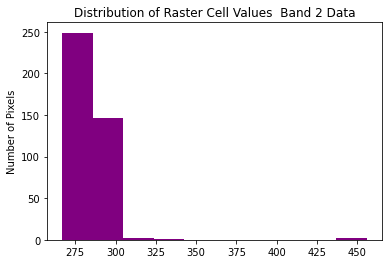

In [522]:
print(files[1])
band2= rxr.open_rasterio(files[1])
ep.plot_bands(band2,
              title="Bigearthnet Band 2 Raster")
plt.show()
print("The CRS of this data is:", band2.rio.crs)
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.
print(band2.rio.bounds())
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
print(band2.rio.resolution())
print("The nodatavalue of your data is:", band2.rio.nodata)
# How many bands / layers does the object have?
print("Number of bands", band2.rio.count)
print("The shape of your data is:", band2.shape)
print('min value:', np.nanmin(band2))
print('max value:', np.nanmax(band2))
import matplotlib.pyplot as plt
f, ax = plt.subplots()
band1.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Band 2 Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [523]:
#https://rasterio.readthedocs.io/en/latest/api/rasterio.plot.html
#rasterio.plot.reshape_as_image(arr)
#Returns the source array reshaped into the order expected by image processing and visualization software (matplotlib, scikit-image, etc) by swapping the axes order from (bands, rows, columns) to (rows, columns, bands)


In [524]:
print('min value:', np.nanmin(data))
print('max value:', np.nanmax(data))

min value: 267
max value: 456


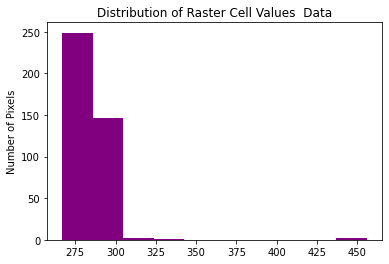

In [525]:
#https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/raster-data-processing/classify-plot-raster-data-in-python/
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [526]:
bins=[0, 100, 200, 250, 275, 300,350]

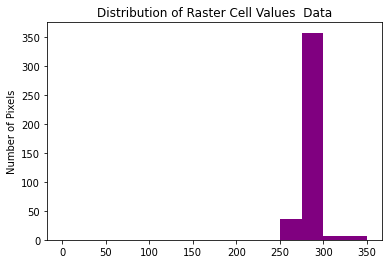

In [527]:
f, ax = plt.subplots()
data.plot.hist(color="purple",bins=[0, 100, 200, 250, 275, 300,350])
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [528]:
class_bins = [-np.inf,250,275,300,350,+np.inf]


In [529]:
import xarray as xr
data_class = xr.apply_ufunc(np.digitize,
                                     data,
                                     class_bins)
print(data_class.shape)
#data_class = np.array(data_class[0])

(1, 20, 20)


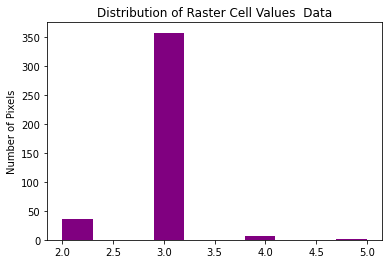

In [530]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()
data_class.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

In [531]:
#https://www.spatialreference.org/ref/epsg/32634/
#/*EPSG:32634

#WGS 84 / UTM zone 34N (Google it)

#WGS84 Bounds: 18.0000, 0.0000, 24.0000, 84.0000
#Projected Bounds: 166021.4431, 0.0000, 833978.5569, 9329005.1825
#Scope: Large and medium scale topographic mapping and engineering survey.
#Last Revised: June 2, 1995
#Area: World - N hemisphere - 18°E to 24°E - by country*/

#Proj4js.defs["EPSG:32634"] = "+proj=utm +zone=34 +ellps=WGS84 +datum=WGS84 +units=m +no_defs";

/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B12.tif


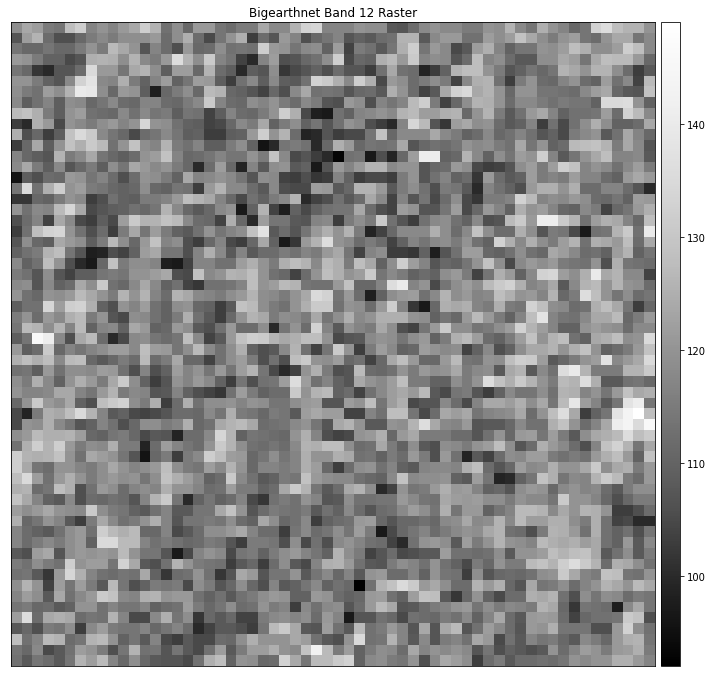

The CRS of this data is: EPSG:32634
+proj=utm +zone=34 +datum=WGS84 +units=m +no_defs
(499980.0, 7032840.0, 501180.0, 7034040.0)
(20.0, -20.0)
The nodatavalue of your data is: None
Number of bands 1
The shape of your data is: (1, 60, 60)
min value: 92
max value: 149


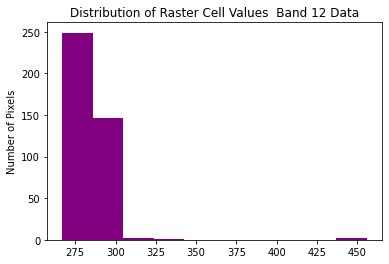

In [532]:
print(files[10])
band12= rxr.open_rasterio(files[10])
ep.plot_bands(band12,
              title="Bigearthnet Band 12 Raster")
plt.show()
print("The CRS of this data is:", band12.rio.crs)
#Converting EPSG to Proj4 in Python
# Convert to project string using earthpy
proj4 = et.epsg['32634']
print(proj4)
#Spatial Extent
#You can access the spatial extent using the .bounds() attribute in rasterio.
print(band12.rio.bounds())
#Raster Resolution: area covered by 1 pixel on ground e.g 60m * 60m
# What is the x and y resolution for your raster data?
print(band12.rio.resolution())
print("The nodatavalue of your data is:", band12.rio.nodata)
# How many bands / layers does the object have?
print("Number of bands", band12.rio.count)
print("The shape of your data is:", band12.shape)
print('min value:', np.nanmin(band12))
print('max value:', np.nanmax(band12))
import matplotlib.pyplot as plt
f, ax = plt.subplots()
band1.plot.hist(color="purple")
ax.set(title="Distribution of Raster Cell Values  Band 12 Data",
       xlabel="",
       ylabel="Number of Pixels")
plt.show()

## New Section : Making Dataframe for min/max values of each bands of 1,2 and 12

In [533]:
import pandas as pd
df = pd.DataFrame(columns= ['filename','min','max'])
df.head()

,filename,min,max


In [534]:
import glob
import os
files_batch=[]  #batch of same bands 
min=[]
max=[]
mean_min =[]
mean_max =[]
path = '/content/drive/MyDrive/Big'
os.chdir(path)
dirs = os.listdir()
dirs.sort()
print(dirs)
print(len(dirs))
#remove last element of list
del dirs[0]
print(dirs)
print(len(dirs))
step_size = len(dirs)

['.ipynb_checkpoints', 'S2A_MSIL2A_20170613T101031_0_55', 'S2A_MSIL2A_20170613T101031_0_59', 'S2A_MSIL2A_20170613T101031_0_63', 'S2A_MSIL2A_20170613T101031_0_70', 'S2A_MSIL2A_20170613T101031_0_79', 'S2A_MSIL2A_20170613T101031_0_88']
7
['S2A_MSIL2A_20170613T101031_0_55', 'S2A_MSIL2A_20170613T101031_0_59', 'S2A_MSIL2A_20170613T101031_0_63', 'S2A_MSIL2A_20170613T101031_0_70', 'S2A_MSIL2A_20170613T101031_0_79', 'S2A_MSIL2A_20170613T101031_0_88']
6


In [535]:
# Add batch of band1 tif files to files list
path = '/content/drive/MyDrive/Big'

for i in dirs:
  s = ""
  s = s + path + '/' + str(i) +  '/' +'*01.tif'
  print(s)
  temp = (glob.glob(os.path.join(s)))
  files_batch.append(temp[0])


/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/*01.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/*01.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/*01.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/*01.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/*01.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/*01.tif


In [536]:
# Fetch Filenames of band 1

print(files_batch,files_batch[0],len(files_batch)) #Batch of Band 1 files

['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/S2A_MSIL2A_20170613T101031_0_59_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/S2A_MSIL2A_20170613T101031_0_63_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/S2A_MSIL2A_20170613T101031_0_70_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/S2A_MSIL2A_20170613T101031_0_79_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/S2A_MSIL2A_20170613T101031_0_88_B01.tif'] /content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif 6


In [537]:
# Add min/max values of band 1 to min/max list

for i in range(0,step_size):
  band1= rxr.open_rasterio(files_batch[i])
  min.append(np.nanmin(band1))
  max.append(np.nanmax(band1))
print(min)
print(max)
mean_min.append(np.mean(min))
mean_max.append(np.mean(max))
#df['B1_min'] = min
#df['B1_max'] = max
#print(df)

[267, 272, 294, 280, 245, 276]
[456, 308, 655, 327, 302, 328]


In [538]:
# Add batch of band2 tif files to files list
path = '/content/drive/MyDrive/Big'

for i in dirs:
  s = ""
  s = s + path + '/' + str(i) +  '/' +'*02.tif'
  print(s)
  temp = (glob.glob(os.path.join(s)))
  files_batch.append(temp[0])
print(files_batch)
print(files_batch[len(files_batch)-1], len(files_batch))


/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/*02.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/*02.tif
['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/S2A_MSIL2A_20170613T101031_0_59_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/S2A_MSIL2A_20170613T101031_0_63_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/S2A_MSIL2A_20170613T101031_0_70_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/S2A_MSIL2A_20170613T101031_0_79_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/S2A_MSIL2A_20170613T101031_

In [539]:
# Add min/max values of band 2 to min/max list

for i in range(step_size,2*step_size):
  band2= rxr.open_rasterio(files_batch[i])
  min.append(np.nanmin(band2))
  max.append(np.nanmax(band2))
print(min)
print(max)
mean_min.append(np.mean(min))
mean_max.append(np.mean(max))

[267, 272, 294, 280, 245, 276, 123, 156, 198, 164, 139, 202]
[456, 308, 655, 327, 302, 328, 1215, 367, 985, 567, 515, 456]


In [540]:
# Add batch of band 12 tif files to files list
path = '/content/drive/MyDrive/Big'

for i in dirs:
  s = ""
  s = s + path + '/' + str(i) +  '/' +'*12.tif'
  print(s)
  temp = (glob.glob(os.path.join(s)))
  files_batch.append(temp[0])
print(files_batch)
print(files_batch[len(files_batch)-1], len(files_batch))


/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/*12.tif
/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/*12.tif
['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/S2A_MSIL2A_20170613T101031_0_59_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/S2A_MSIL2A_20170613T101031_0_63_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/S2A_MSIL2A_20170613T101031_0_70_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/S2A_MSIL2A_20170613T101031_0_79_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/S2A_MSIL2A_20170613T101031_

In [541]:
# Add min/max values of band 12 to min/max list

for i in range(2*step_size,3*step_size):
  band2= rxr.open_rasterio(files_batch[i])
  min.append(np.nanmin(band2))
  max.append(np.nanmax(band2))
print(min)
print(max)
mean_min.append(np.mean(min))
mean_max.append(np.mean(max))


[267, 272, 294, 280, 245, 276, 123, 156, 198, 164, 139, 202, 92, 91, 95, 104, 119, 115]
[456, 308, 655, 327, 302, 328, 1215, 367, 985, 567, 515, 456, 149, 144, 1606, 153, 191, 170]


# Add files and min/max lists to dataframe

In [542]:
print(files_batch)
df['filename'] = files_batch
df['min'] = min
df['max'] = max
df.head()

['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/S2A_MSIL2A_20170613T101031_0_59_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/S2A_MSIL2A_20170613T101031_0_63_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/S2A_MSIL2A_20170613T101031_0_70_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_79/S2A_MSIL2A_20170613T101031_0_79_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_88/S2A_MSIL2A_20170613T101031_0_88_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_59/S2A_MSIL2A_20170613T101031_0_59_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_63/S2A_MSIL2A_20170613T101031_0_63_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_70/S2A_MSIL2A_20170613T1

,filename,min,max
0,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,267,456
1,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,272,308
2,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,294,655
3,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,280,327
4,/content/drive/MyDrive/Big/S2A_MSIL2A_20170613...,245,302


In [543]:
#print means of min and max values for each band 1 2 and 12
print(mean_min)
print(mean_max)

[272.3333333333333, 218.0, 179.55555555555554]
[396.0, 540.0833333333334, 494.1111111111111]


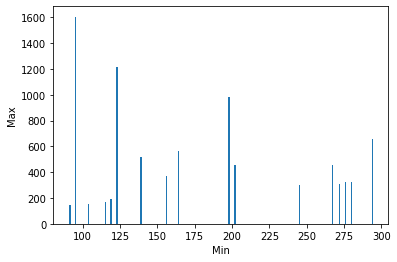

In [544]:
# Plot histogram 
import matplotlib.pyplot as plt
x=np.array(min)
y=np.array(max)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Min')
plt.ylabel('Max')
plt.show()

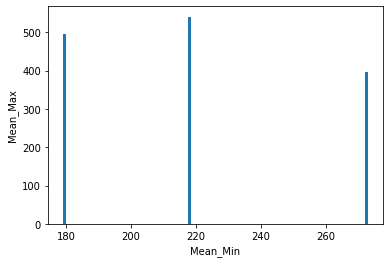

In [545]:
# Plot histogram for mean min and mean max
import matplotlib.pyplot as plt
x=np.array(mean_min)
y=np.array(mean_max)
plt.bar(x,y,align='center') # A bar chart
plt.xlabel('Mean_Min')
plt.ylabel('Mean_Max')
plt.show()

### **USE RASTERIO module to open Raster images and read it to Array**

In [546]:
band1 = np.array(band1)
band1.shape

(1, 20, 20)

In [547]:
print(files)
band2= rxr.open_rasterio(files[1])
band2 = np.array(band2)
band2.shape

['/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B02.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B03.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B04.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B05.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B06.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B07.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B08.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B09.tif', '/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T1

(1, 120, 120)

In [548]:
band12 = np.array(band12)
band12.shape

(1, 60, 60)

In [554]:
print(df['filename'])
files_bands = []
files_bands = df['filename']
print(files_bands[0:6])

0     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
1     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
2     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
3     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
4     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
5     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
6     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
7     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
8     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
9     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
10    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
11    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
12    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
13    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
14    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
15    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
16    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
17    /content/drive/MyDrive/Big/S2A_MSIL2A_2017

In [570]:
# Reading raster geotif files 
#https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html
import rasterio 
band1_batch = files_bands[0:6]
print(band1_batch[0])
band1_raster = rasterio.open(band1_batch[0])
print(type(band1_raster))

/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif
<class 'rasterio.io.DatasetReader'>


In [562]:
#Projection
print(band1_raster.crs)

EPSG:32634


In [563]:
#Affine transform (how raster is scaled, rotated, skewed, and/or translated
band1_raster.transform

Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 7034040.0)

In [564]:
band1_raster.meta

{'count': 1,
 'crs': CRS.from_epsg(32634),
 'driver': 'GTiff',
 'dtype': 'uint16',
 'height': 20,
 'nodata': None,
 'transform': Affine(60.0, 0.0, 499980.0,
       0.0, -60.0, 7034040.0),
 'width': 20}

In [567]:
#reading raster to array

band1_array = band1_raster.read()
print(band1_array)

[[[278 273 280 280 280 282 290 292 282 280 275 275 278 280 276 283 279
   283 299 287]
  [282 280 282 282 278 280 290 283 281 281 285 273 271 278 285 281 281
   283 286 275]
  [282 280 285 280 276 276 276 273 283 286 288 285 291 286 288 281 279
   277 289 277]
  [280 285 299 288 282 271 270 275 270 273 280 281 286 290 279 283 284
   282 289 279]
  [282 280 275 278 275 273 281 281 271 269 268 271 283 284 281 286 294
   289 289 282]
  [282 283 280 280 278 270 278 280 280 278 278 278 271 267 272 284 298
   289 291 290]
  [285 288 280 283 290 280 286 281 280 281 281 279 273 271 274 279 284
   279 284 289]
  [288 285 278 280 275 276 288 290 286 279 290 283 276 269 286 284 287
   287 287 289]
  [290 290 287 281 280 278 278 286 290 283 276 274 279 272 282 287 289
   284 290 280]
  [290 288 285 278 283 286 283 290 286 288 288 284 281 286 284 286 286
   277 289 299]
  [292 283 281 281 281 288 290 286 279 281 293 289 281 282 289 299 289
   287 278 287]
  [280 280 290 300 274 278 279 279 288 278 

In [572]:
stats = []

for band in band1_array:
  stats.append({
      'mean' :  band.mean(),
      'min'  :  band.min(),
      'max'  :  band.max(),
      'median': np.median(band)
  })
print(stats)

[{'mean': 284.155, 'min': 267, 'max': 456, 'median': 282.0}]


# Read all Band1 files and find mean of all 6 Forest class Band1 data

In [573]:
print(df['filename'])
files_bands = []
files_bands = df['filename']
print(files_bands[0:6])

0     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
1     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
2     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
3     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
4     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
5     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
6     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
7     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
8     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
9     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
10    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
11    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
12    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
13    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
14    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
15    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
16    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
17    /content/drive/MyDrive/Big/S2A_MSIL2A_2017

In [587]:
# Reading raster geotif files using Rasterio
#https://automating-gis-processes.github.io/CSC18/lessons/L6/reading-raster.html
import rasterio 
band1_batch = files_bands[0:6]
print(band1_batch[0])
band1_array=[]
for i in band1_batch:
  band1_raster = rasterio.open(i)
  band1_array.append(band1_raster.read())
band1_mean=[]
band1_min = []
band1_max = []
print(len(band1_array))
for i in band1_array:
    for band in i:
        band1_mean.append(band.mean())
        band1_min.append(band.min())
        band1_max.append(band.max())
print("Band 1 stat for 6 images is :------>")
print(band1_mean)
print(band1_min)
print(band1_max)

/content/drive/MyDrive/Big/S2A_MSIL2A_20170613T101031_0_55/S2A_MSIL2A_20170613T101031_0_55_B01.tif
6
Band 1 stat for 6 images is :------>
[284.155, 291.2275, 322.03, 298.41, 280.095, 299.23]
[267, 272, 294, 280, 245, 276]
[456, 308, 655, 327, 302, 328]


In [593]:
# Stat for band 2 images 
band2_batch = files_bands[6:12]
print(band2_batch)
band2_array=[]
for i in band2_batch:
  band2_raster = rasterio.open(i)
  band2_array.append(band2_raster.read())
band2_mean=[]
band2_min = []
band2_max = []
print(len(band2_array))
for i in band2_array:
    for band in i:
        band2_mean.append(band.mean())
        band2_min.append(band.min())
        band2_max.append(band.max())
print("Band 2 stat for 6 images is :------>")
print(band2_mean)
print(band2_min)
print(band2_max)

6     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
7     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
8     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
9     /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
10    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
11    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
Name: filename, dtype: object
6
Band 2 stat for 6 images is :------>
[219.92625, 230.166875, 284.25319444444443, 245.0898611111111, 250.07444444444445, 291.131875]
[123, 156, 198, 164, 139, 202]
[1215, 367, 985, 567, 515, 456]


In [594]:
# Stat for band 12 images 
band12_batch = files_bands[12:18]
print(band12_batch)
band12_array=[]
for i in band12_batch:
  band12_raster = rasterio.open(i)
  band12_array.append(band12_raster.read())
band12_mean=[]
band12_min = []
band12_max = []
print(len(band12_array))
for i in band12_array:
    for band in i:
        band12_mean.append(band.mean())
        band12_min.append(band.min())
        band12_max.append(band.max())
print("Band 12 stat for 6 images is :------>")
print(band12_mean)
print(band12_min)
print(band12_max)

12    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
13    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
14    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
15    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
16    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
17    /content/drive/MyDrive/Big/S2A_MSIL2A_20170613...
Name: filename, dtype: object
6
Band 12 stat for 6 images is :------>
[116.59972222222223, 120.09611111111111, 139.85916666666665, 126.83305555555556, 158.13972222222222, 142.49055555555555]
[92, 91, 95, 104, 119, 115]
[149, 144, 1606, 153, 191, 170]
